In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns
# reading the CSV file into pandas dataframe
data = pd.read_csv("wall_street_data.csv") 

In [3]:
data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [11]:
data.rename(index=str,columns={'Unnamed: 0':'company'})

,company,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [24]:
companies = data.iloc[:,1:965].values
movements = data.iloc[:,0:1].values


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import pipeline
normalizer= Normalizer()
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(normalizer,kmeans)
pipeline.fit(movements)
labels= pipeline.predict(movements)
df = pd.DataFrame

Normalizer(copy=True, norm='l2')

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(companies)
data1=transformer.transform(companies)

In [29]:
data2=pd.DataFrame(data1)

In [30]:
data2

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
0,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,...,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
1,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,...,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
2,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,...,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
3,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,...,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
4,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,...,0.053043,0.084326,0.000680,-0.041483,0.016321,0.102687,-0.001020,0.065964,0.038423,0.010541
5,0.064790,0.066230,0.025916,0.035995,-0.028795,-0.008639,-0.051832,0.027356,0.027356,-0.054712,...,0.034555,0.030235,-0.007199,-0.001440,-0.004319,-0.034555,0.007199,0.015838,-0.008639,-0.015838
6,0.008752,0.010697,0.001945,0.012156,-0.017505,-0.004862,0.027716,-0.006807,0.012642,-0.007294,...,0.010697,0.109404,0.022853,0.015560,-0.001945,-0.020908,-0.000972,-0.006321,0.016046,0.055918
7,0.064870,0.032879,-0.008886,-0.015107,0.002666,0.009775,-0.007109,0.012441,0.034656,-0.011552,...,0.018661,0.049763,0.006220,0.010663,0.004443,-0.040877,0.023104,-0.009775,0.007998,-0.009775
8,0.023458,0.018246,0.006516,0.009644,0.028411,0.082887,-0.020070,0.005995,-0.003128,-0.034667,...,0.005474,0.013554,0.026847,-0.000521,0.033624,-0.010165,0.031539,0.011729,-0.005734,0.004170
9,0.015703,0.039694,-0.012650,-0.002617,0.056706,0.022246,0.045801,0.023119,-0.015703,-0.023555,...,0.041439,0.066303,-0.013958,-0.021810,0.047110,0.012214,0.027045,0.015703,0.046674,0.045801


In [31]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')
model.fit(data2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=6,
            pooling_func=<function mean at 0x01244858>)

In [32]:
data2['labels'] = model.labels_

data2.groupby(["labels"]).count()

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
labels,,,,,,,,,,,,,,,,,,,,,
0,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
1,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [33]:
data2['labels'] = model.labels_

data2.groupby(["labels"]).count()

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
labels,,,,,,,,,,,,,,,,,,,,,
0,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
1,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [35]:
stock_clusters = data2.groupby(['labels'])

In [36]:
stock_groups=stock_clusters.head(60)

In [40]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [47]:
Z = linkage(data2, 'average')
c, coph_dists = cophenet(Z , pdist(data2))

c

0.90391701514916722

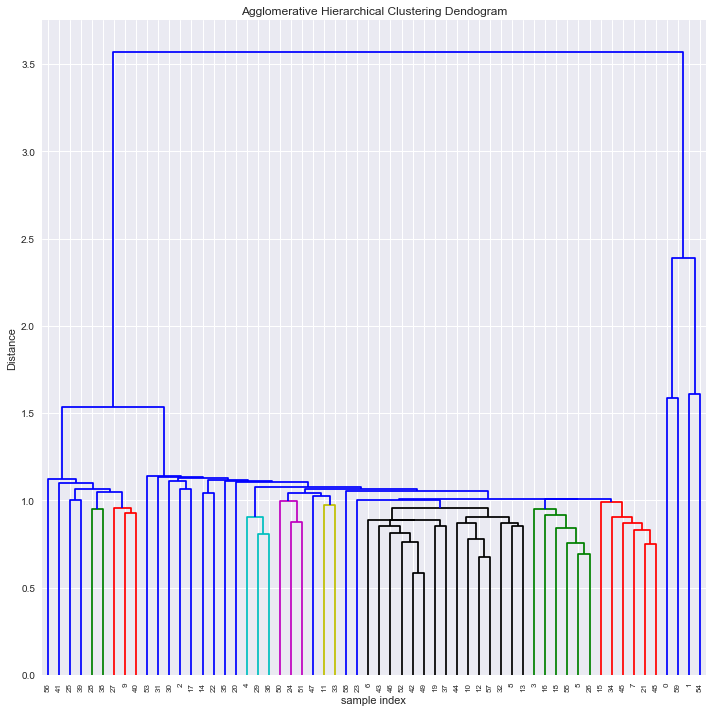

In [45]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 1, leaf_font_size=8. )
plt.tight_layout()